# Challenge: Feedback analysis

In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import gutenberg, stopwords
from nltk.tokenize import word_tokenize
import spacy
from collections import Counter
from textblob import TextBlob
from sklearn.naive_bayes import BernoulliNB

In [43]:
data_path = ('yelp_labelled.txt')
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['message','like']

In [44]:
stop = stopwords.words('english')

In [4]:
sms_raw.head()

,message,like
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
sms_raw.describe()

,like
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [45]:
sms_raw['message'] = sms_raw['message'].str.lower()

In [46]:
bad_reviews_df = sms_raw[sms_raw['like'] == 0]
good_reviews_df = sms_raw[sms_raw['like'] == 1]

In [47]:
# remove stop words
bad_reviews_df = sms_raw[sms_raw['like'] == 0]
bad_reviews = bad_reviews_df['message'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
good_reviews_df = sms_raw[sms_raw['like'] == 1]
good_reviews = good_reviews_df['message'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [48]:
# split the words
bad_reviews = bad_reviews.str.split(' ')
good_reviews = good_reviews.str.split(' ')

In [16]:
list(good_reviews)

[['wow...', 'loved', 'place.'],
 ['stopped',
  'late',
  'may',
  'bank',
  'holiday',
  'rick',
  'steve',
  'recommendation',
  'loved',
  'it.'],
 ['selection', 'menu', 'great', 'prices.'],
 ['fries', 'great', 'too.'],
 ['great', 'touch.'],
 ['service', 'prompt.'],
 ['tried', 'cape', 'cod', 'ravoli,', 'chicken,with', 'cranberry...mmmm!'],
 ['highly', 'recommended.'],
 ['food,', 'amazing.'],
 ['service', 'also', 'cute.'],
 ['could', 'care', 'less...', 'interior', 'beautiful.'],
 ['performed.'],
 ["that's",
  'right....the',
  'red',
  'velvet',
  'cake.....ohhh',
  'stuff',
  'good.'],
 ['hole',
  'wall',
  'great',
  'mexican',
  'street',
  'tacos,',
  'friendly',
  'staff.'],
 ['also',
  'combos',
  'like',
  'burger,',
  'fries,',
  'beer',
  '23',
  'decent',
  'deal.'],
 ['found', 'place', 'accident', 'could', 'happier.'],
 ['overall,', 'like', 'place', 'lot.'],
 ['redeeming', 'quality', 'restaurant', 'inexpensive.'],
 ['ample', 'portions', 'good', 'prices.'],
 ['first', 'visit

In [49]:
keywords = ['fun', 'wonderful', 'loved', 'amazing', 'delicious', 'great', 'good']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

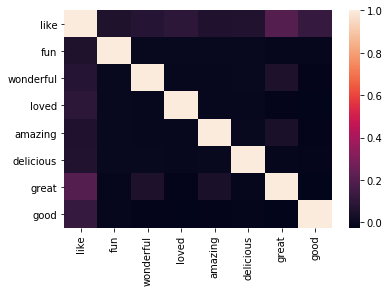

In [50]:
sns.heatmap(sms_raw.corr())

In [51]:
data = sms_raw[keywords]
target = sms_raw['message']

In [52]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target == y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 5


In [40]:
amazon_data = ('amazon_cells_labelled.txt')
amazon_raw = pd.read_csv(amazon_data, delimiter= '\t', header=None)
amazon_raw.columns = ['message','like']

In [54]:
keywords = ['fun', 'wonderful', 'loved', 'amazing', 'delicious', 'great', 'good']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_raw[str(key)] = amazon_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [55]:
amazon_data = amazon_raw[keywords]
amazon_target = amazon_raw['message']

In [56]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(amazon_data, amazon_target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(amazon_data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    amazon_data.shape[0],
    (amazon_target == y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 4
